In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pylab as plt
import datetime
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score, accuracy_score

In [23]:
#запускаем из TimeGramian
#%%time
# %run data_generate.ipynb


In [34]:
%%time
%run Time_GramianAngularField.ipynb

(114393, 20, 20)

(114393, 20, 20)

'con_div_MACD'

(array([-1,  0,  1], dtype=int64), array([15160, 84441, 14792], dtype=int64))

'cross_SMA_25'

(array([-1,  0,  1], dtype=int64),
 array([  5743, 102896,   5754], dtype=int64))

'BB'

(array([-1,  0,  1], dtype=int64), array([10300, 93246, 10847], dtype=int64))

(85794, 20, 20, 2)

(85794,)

(17159, 20, 20, 2)

(17159,)

(11440, 20, 20, 2)

(11440,)

(85794,)

(17159,)

(11440,)

'X_train, Y_train, X_test, Y_test, X_cv, Y_cv, Pr_train, Pr_test, Pr_cv'

'cross_SMA_25'

Wall time: 4.71 s


In [35]:
#переходничок
x_train_i = X_train  
y_train   = Y_train
x_test_i  = X_test
y_test    = Y_test
x_cv_i    = X_cv
y_cv      = Y_cv
display(aaa)

'([X_gadf.T, X_gasf.T]).T'

In [36]:
# %%time
# %run one_result.ipynb

In [37]:
#повторяемость достичь. не проверял
# %%time
# %run one_result.ipynb

In [38]:
%%time
%run get_sample.ipynb
#sample_weights = get_sample_weights(y_train)
#print("Test sample_weights")
#rand_idx = np.random.choice(y_train.index, 30) ## ПОДПРАВИЛ
#print(y_train[rand_idx])

#more simple
#sample_weight = np.ones(shape=(len(y_train),))
# sample_weight[np.array(y_train) == 1] = 2
# sample_weight[np.array(y_train) == 0] = 2

Wall time: 31 ms


In [39]:
%%time
%run CNN_model.ipynb

Wall time: 26 ms


Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}


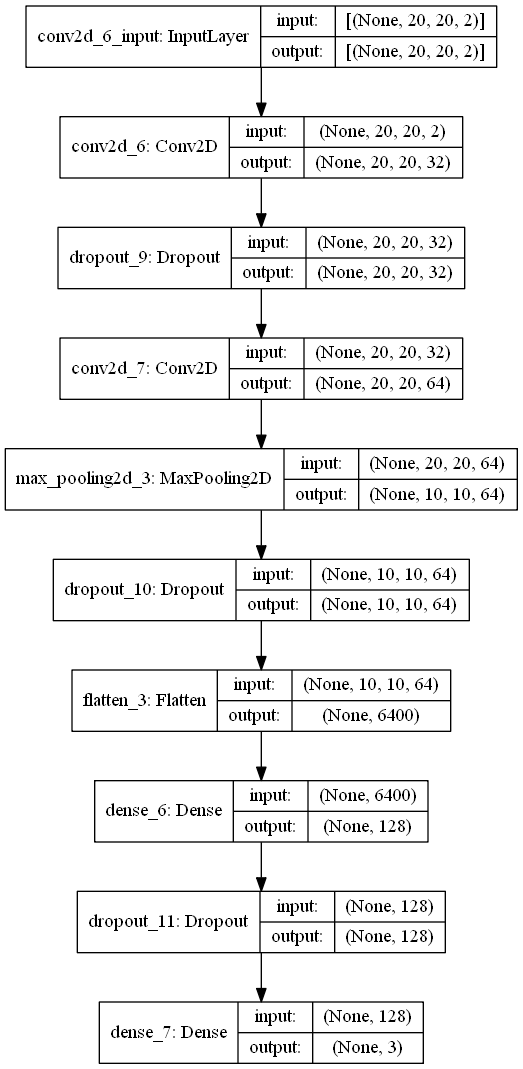

In [40]:
#РИСУЕМ МОДЕЛЬ

from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

model = create_model_cnn(params)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [42]:
%%time
import os
#В ЦИКЛЕ 
class_weight = {0: 1, 1: 1.5, -1: 1.5}
history_all = {}
feature_all = {}

iter = 1
for pp in range(iter):
 #   for aa in ['adam', 'sgd', 'rmsprop']:
    for aa in ['adam']:
        params = {'batch_size': 80, 
          'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 
                                               'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 
                                               'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 
                                               'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
          'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 1000, 
          'lr': 0.001, 
          'optimizer': aa}

        #ЗАДАЕМ КОЛБЕКИ ES, RLP, MCP
        best_model_path = os.path.join('.' + str(aaa) + str(pp) + str(aa) +'_best_model_keras')
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                           patience=200, min_delta=0.0001, restore_best_weights = True)
        # csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'log_training_batch.log'), append=True)
        rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                                min_delta=0.001, cooldown=1, min_lr=0.0001)
        mcp = ModelCheckpoint(best_model_path, monitor='val_f1_metric', verbose=1,
                              save_best_only=True, save_weights_only=False, mode='max', period=1)  # val_f1_metric



        history_all[f'history{pp}{aa}']  = model.fit(x_train_i, y_train, epochs=params['epochs'], verbose=1,
                                    batch_size=1024, shuffle=True,  # 64--1024
                                   # validation_split=0.3,
                                    validation_data=(x_cv_i, y_cv),
                                    callbacks=[mcp, rlp, es],
                                  #  sample_weight=sample_weight, #закоментил
                                  #  class_weight = class_weight
                                                    )

Train on 85794 samples, validate on 11440 samples
Epoch 1/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.3711 - acc: 0.8912 - f1_metric: 0.8890
Epoch 00001: val_f1_metric improved from -inf to 0.90332, saving model to .([X_gadf.T, X_gasf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 59s 684us/sample - loss: 0.3704 - acc: 0.8912 - f1_metric: 0.8889 - val_loss: 0.2741 - val_acc: 0.9009 - val_f1_metric: 0.9033
Epoch 2/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9114 - f1_metric: 0.9112
Epoch 00002: val_f1_metric improved from 0.90332 to 0.91969, saving model to .([X_gadf.T, X_gasf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 59s 688us/sample - loss: 0.2134 - acc: 0.9115 - f1_metric: 0.9113 - val_loss: 0.1897 - val_acc: 0.9204 - val_f1_metric: 0.9197
Epoch 3/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.1799 - acc: 0.9233 - f1_metric: 0.9233
Epoc

KeyboardInterrupt: 

Train on 85794 samples, validate on 11440 samples
Epoch 1/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.3866 - acc: 0.8951 - f1_metric: 0.8888
Epoch 00001: val_f1_metric improved from -inf to 0.89944, saving model to .([X_gadf.T, X_gasf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 15s 169us/sample - loss: 0.3856 - acc: 0.8953 - f1_metric: 0.8891 - val_loss: 0.3023 - val_acc: 0.9008 - val_f1_metric: 0.8994
Epoch 2/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.2977 - acc: 0.8987 - f1_metric: 0.8987
Epoch 00002: val_f1_metric improved from 0.89944 to 0.90121, saving model to .([X_gadf.T, X_gasf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 14s 166us/sample - loss: 0.2975 - acc: 0.8987 - f1_metric: 0.8988 - val_loss: 0.2831 - val_acc: 0.9010 - val_f1_metric: 0.9012
Epoch 3/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.2865 - acc: 0.8993 - f1_metric: 0.8993
Epoc

KeyboardInterrupt: 

Train on 85794 samples, validate on 11440 samples
Epoch 1/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.6402 - acc: 0.7337 - f1_metric: 0.7287
Epoch 00001: val_f1_metric improved from -inf to 0.79494, saving model to .([X_gadf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 90s 1ms/sample - loss: 0.6392 - acc: 0.7337 - f1_metric: 0.7288 - val_loss: 0.4729 - val_acc: 0.7936 - val_f1_metric: 0.7949
Epoch 2/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.3796 - acc: 0.8282 - f1_metric: 0.8281
Epoch 00002: val_f1_metric improved from 0.79494 to 0.88164, saving model to .([X_gadf.T]).T0adam_best_model_keras
85794/85794 [==============================] - 90s 1ms/sample - loss: 0.3790 - acc: 0.8286 - f1_metric: 0.8285 - val_loss: 0.2901 - val_acc: 0.8812 - val_f1_metric: 0.8816
Epoch 3/1000
84992/85794 [============================>.] - ETA: 0s - loss: 0.2683 - acc: 0.8865 - f1_metric: 0.8864
Epoch 00003: val_f1_metric i

KeyboardInterrupt: 

In [43]:
%%time
%run my_func.ipynb

'metrics(pp,x_test_i,x_train_i,x_cv_i, thresh, k, verbose)'

Wall time: 78 ms


C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'RASP'

'accuracy_label1 : 0.67'

'accuracy_label2 : 0.5'

'SNGS'

'accuracy_label1 : 0.64'

'accuracy_label2 : 0.67'

'SNGSP'

'accuracy_label1 : 0.55'

'accuracy_label2 : 0.61'

'BANE'

'accuracy_label1 : 0.63'

'accuracy_label2 : 0.6'

'SIBN'

'accuracy_label1 : 0.61'

'accuracy_label2 : 0.66'

'MFON'

'accuracy_label1 : 0.62'

'accuracy_label2 : 0.7'

Wall time: 4.62 s


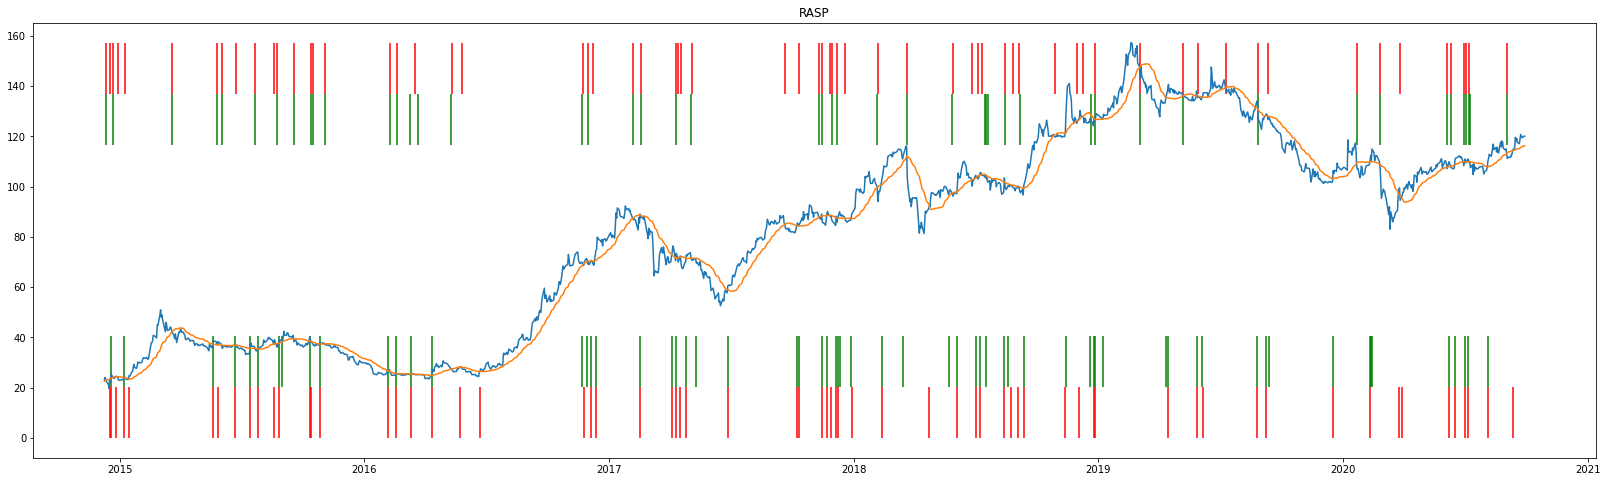

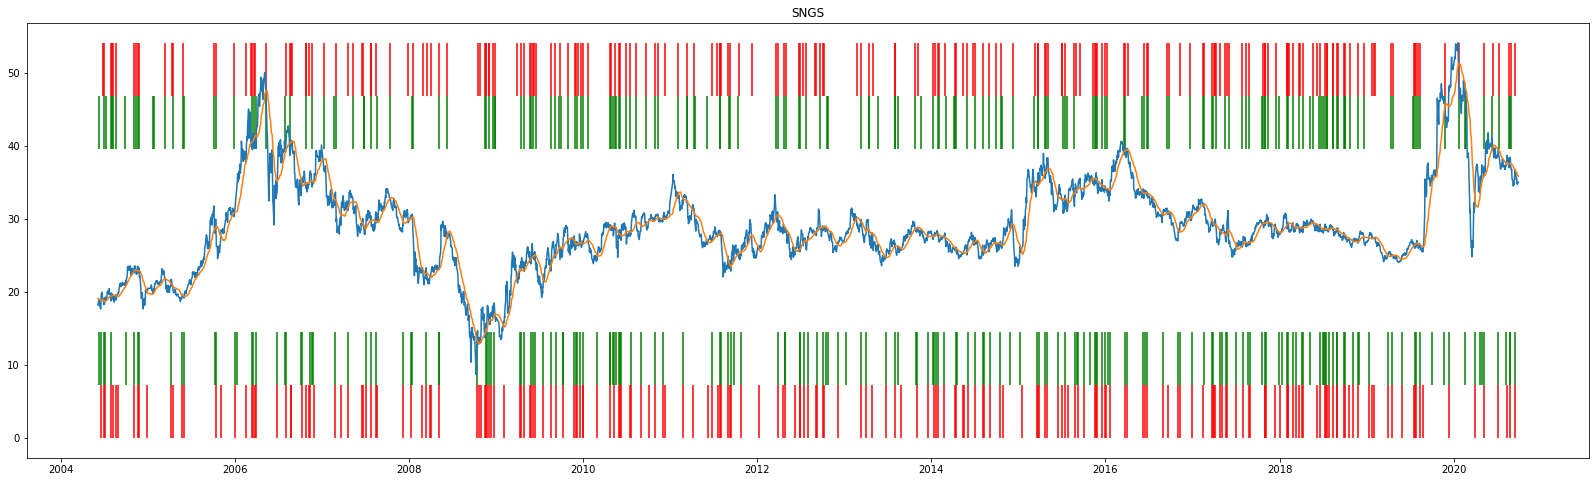

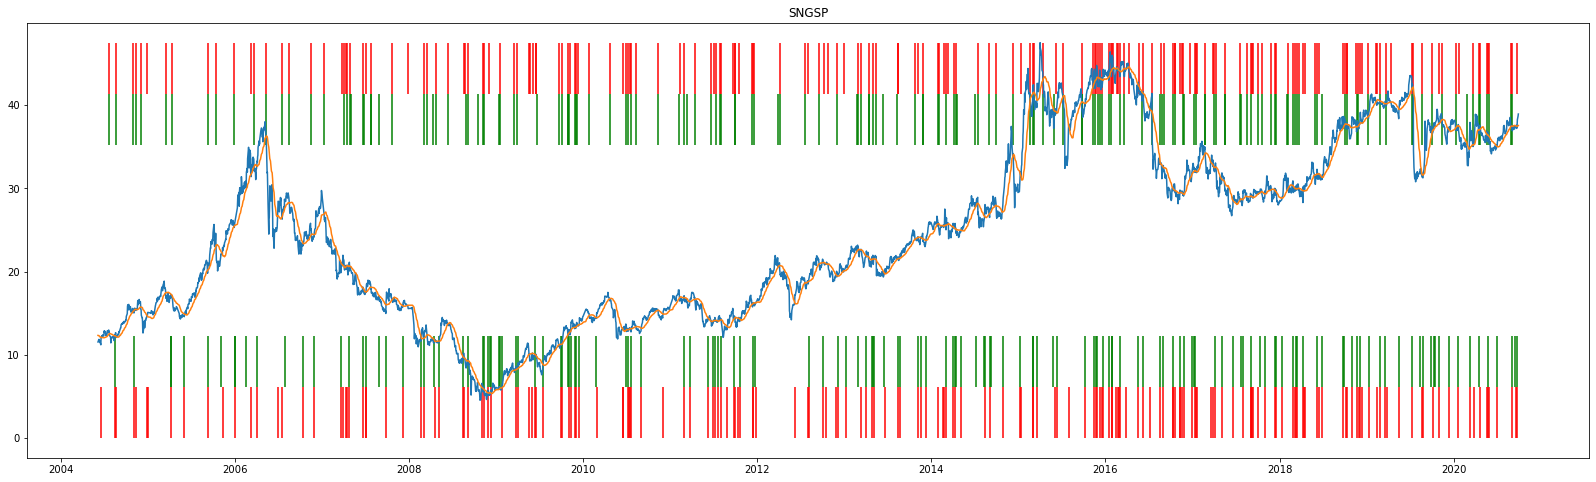

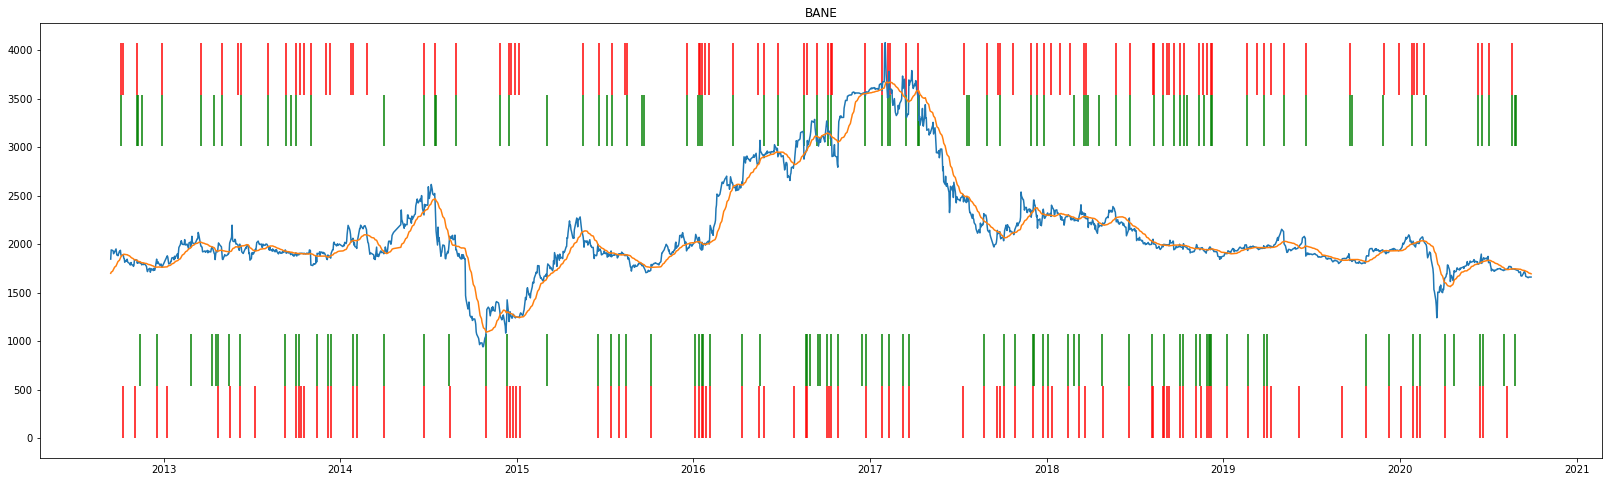

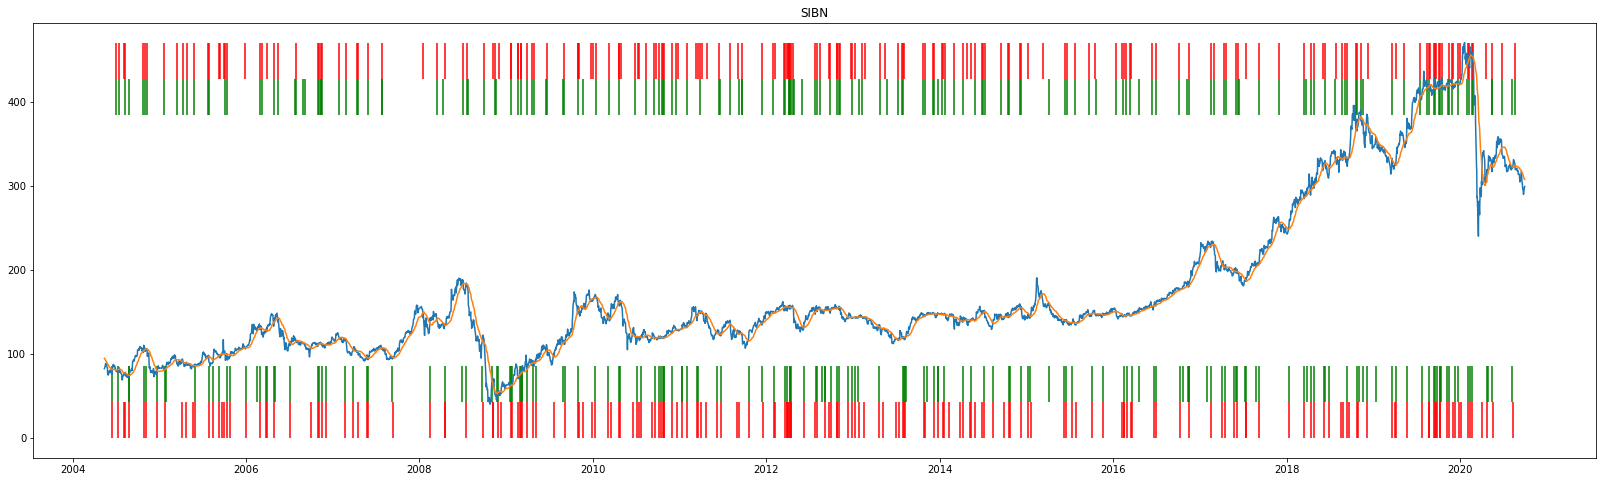

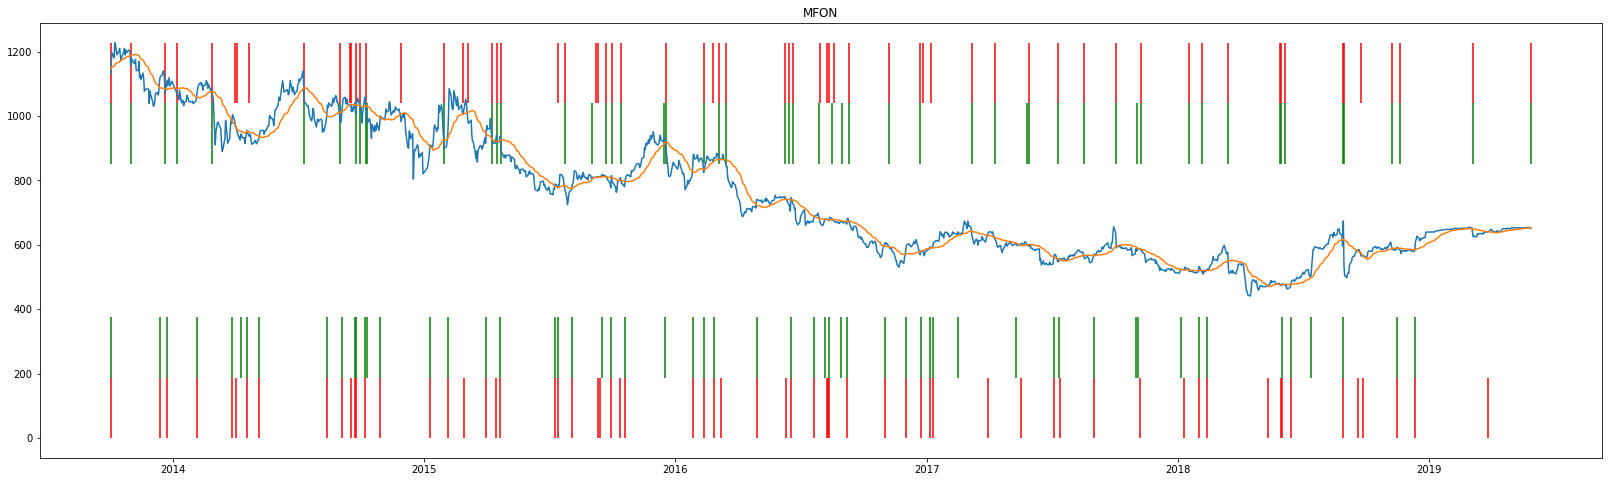

In [44]:
%%time

#paint calculate, 

df_merg_test = df_merg.iloc[te_n:]
df_merg_test['fact']  =  np.argmax(y_test, axis=1)
df_merg_test['forec'] =  np.argmax(model.predict(x_test_i), axis=1)

#метки для графиков 

leble = df_merg_test[df_merg_test['fact']  == 2][['Date', 'Close', 'Symbol', 'fact', 'forec']]
forec = df_merg_test[df_merg_test['forec'] == 2][['Date', 'Close', 'Symbol']]

leble1 = df_merg_test[df_merg_test['fact']  == 1][['Date', 'Close', 'Symbol', 'fact', 'forec']]
forec1 = df_merg_test[df_merg_test['forec'] == 1][['Date', 'Close', 'Symbol']]

# Point

for ii in df_merg['Symbol'].iloc[te_n:].unique():
#    display(ii)
    df_me = df_merg_test[df_merg_test['Symbol'] == ii]
    display(ii)
    for gg in [1,2]:
        
        k = accuracy_score(df_me[df_me['fact'] == gg]['fact'], df_me[df_me['fact'] == gg]['forec']).round(2)
        display('accuracy_label{} : {}'.format(gg, k))
    
    plt.figure(figsize = (28,8))
    plt.title(ii)
    plt.plot(df_me['Date'], df_me['Close'], )
#     plt.scatter(leble[leble['Symbol']==ii]['Date'], leble[leble['Symbol']==ii]['Close'], )
#     plt.scatter(forec[forec['Symbol']==ii]['Date'], forec[forec['Symbol']==ii]['Close'], )
    
    plt.vlines (leble1[leble1['Symbol']==ii]['Date'], 0,                       df_me['Close'].mean()/4, colors='r')
    plt.vlines (forec1[forec1['Symbol']==ii]['Date'], df_me['Close'].mean()/4, df_me['Close'].mean()/2, colors='g')
    
    plt.vlines (leble[leble['Symbol']==ii]['Date'], df_me['Close'].max(),                           df_me['Close'].max() - df_me['Close'].mean()/4, colors='r')
    plt.vlines (forec[forec['Symbol']==ii]['Date'], df_me['Close'].max() - df_me['Close'].mean()/4, df_me['Close'].max() - df_me['Close'].mean()/2, colors='g')
    
    plt.plot(df_me['Date'], df_me['SMA_25'], )
#    plt.text(datetime.date(2014,12,12), 22.50,'**')
 #   plt.text(df_me[df_me['cross_SMA_25'] == -1]['Date'],df_me[df_me['cross_SMA_25'] == -1]['Close'],'First')
    plt.show

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'RASP'

'accuracy_label1 : 0.02'

'accuracy_label2 : 0.02'

'SNGS'

'accuracy_label1 : 0.01'

'accuracy_label2 : 0.04'

'SNGSP'

'accuracy_label1 : 0.03'

'accuracy_label2 : 0.04'

'BANE'

'accuracy_label1 : 0.04'

'accuracy_label2 : 0.13'

'SIBN'

'accuracy_label1 : 0.01'

'accuracy_label2 : 0.03'

'MFON'

'accuracy_label1 : 0.06'

'accuracy_label2 : 0.11'

Wall time: 1.68 s


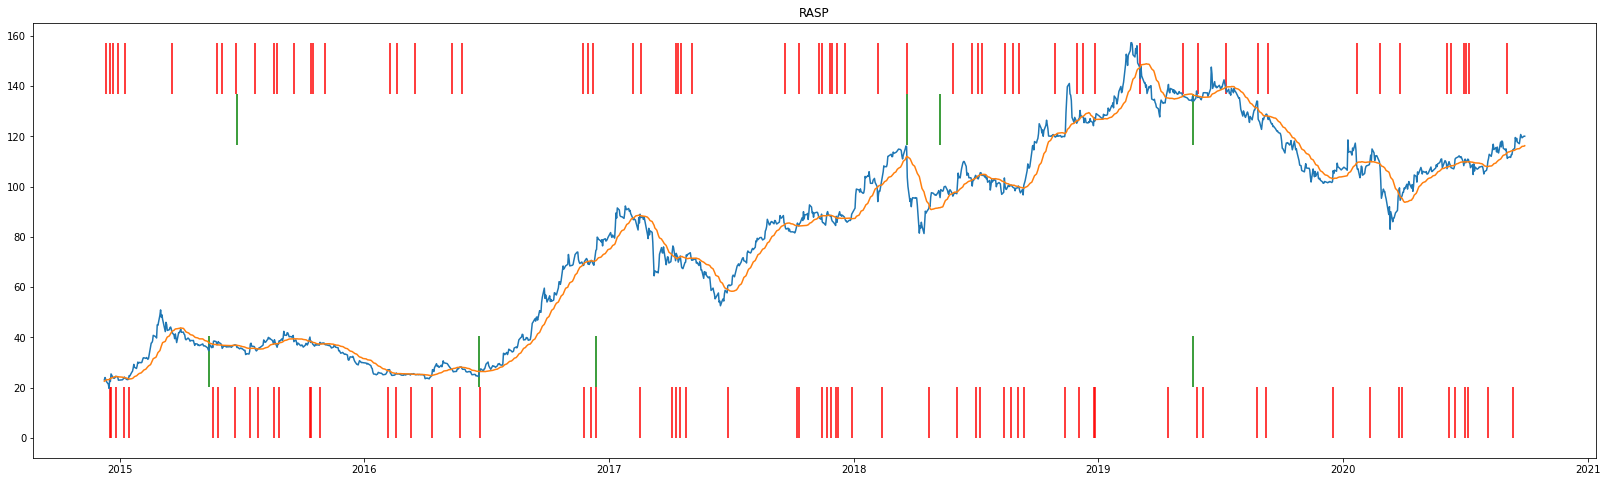

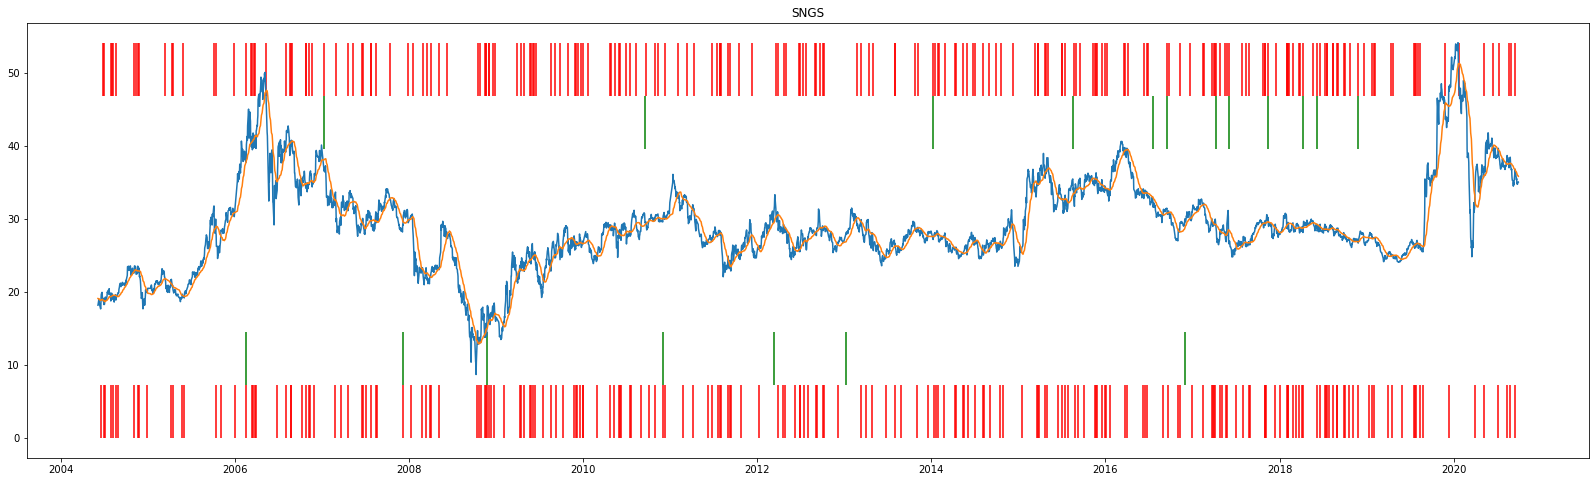

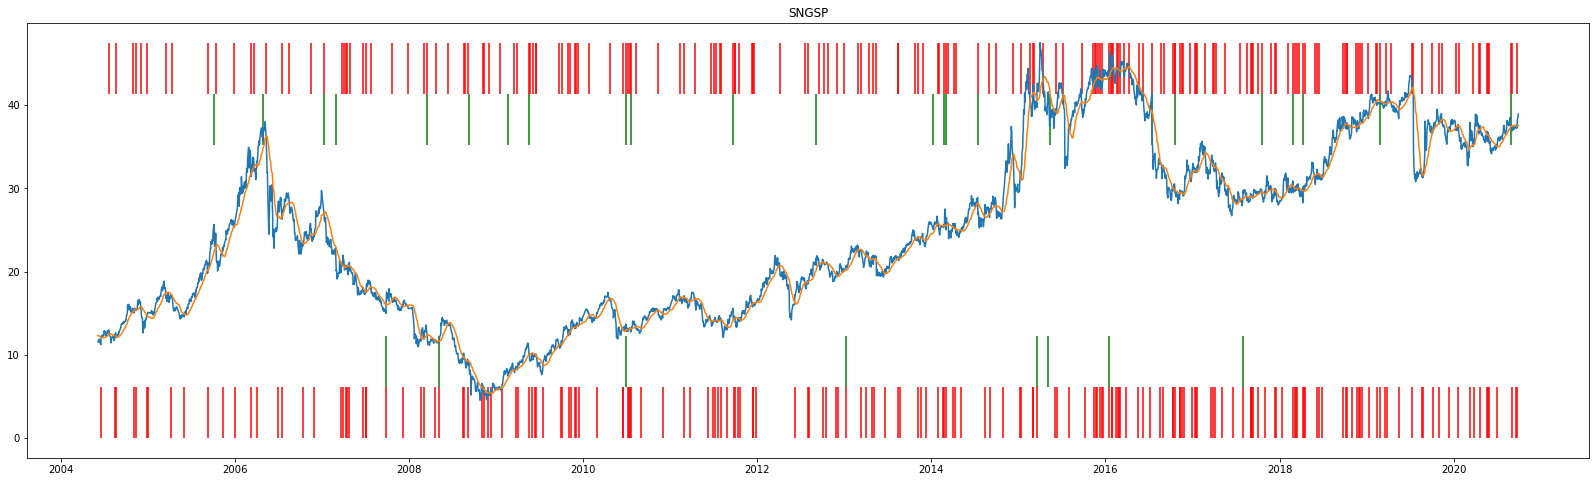

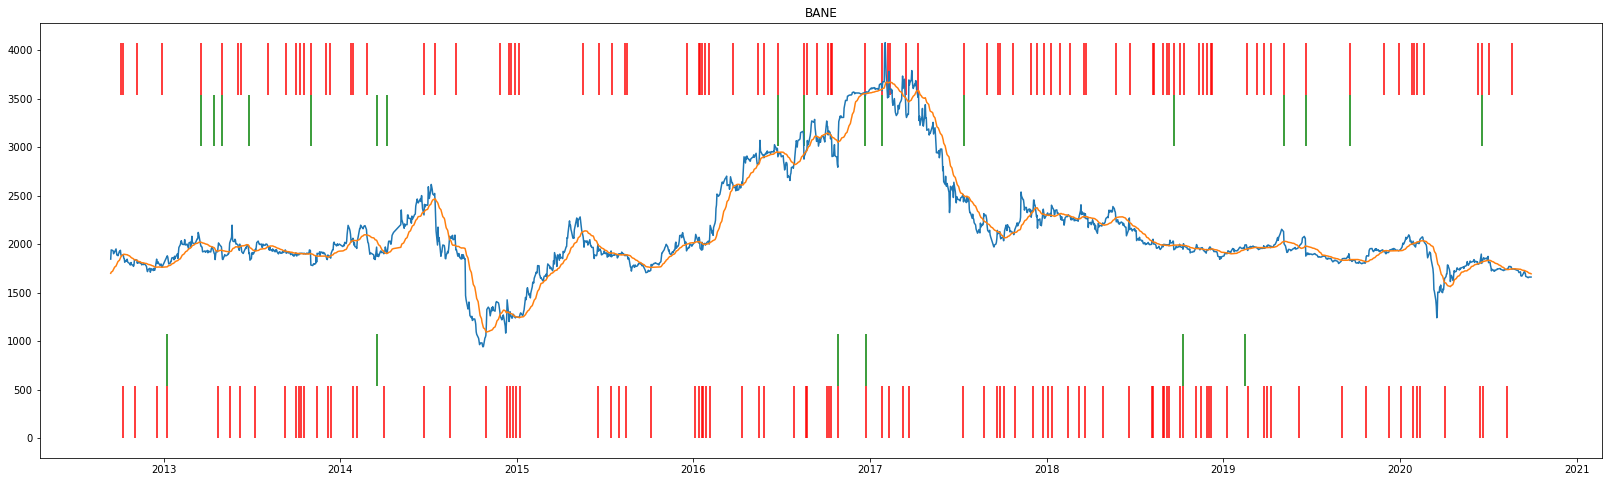

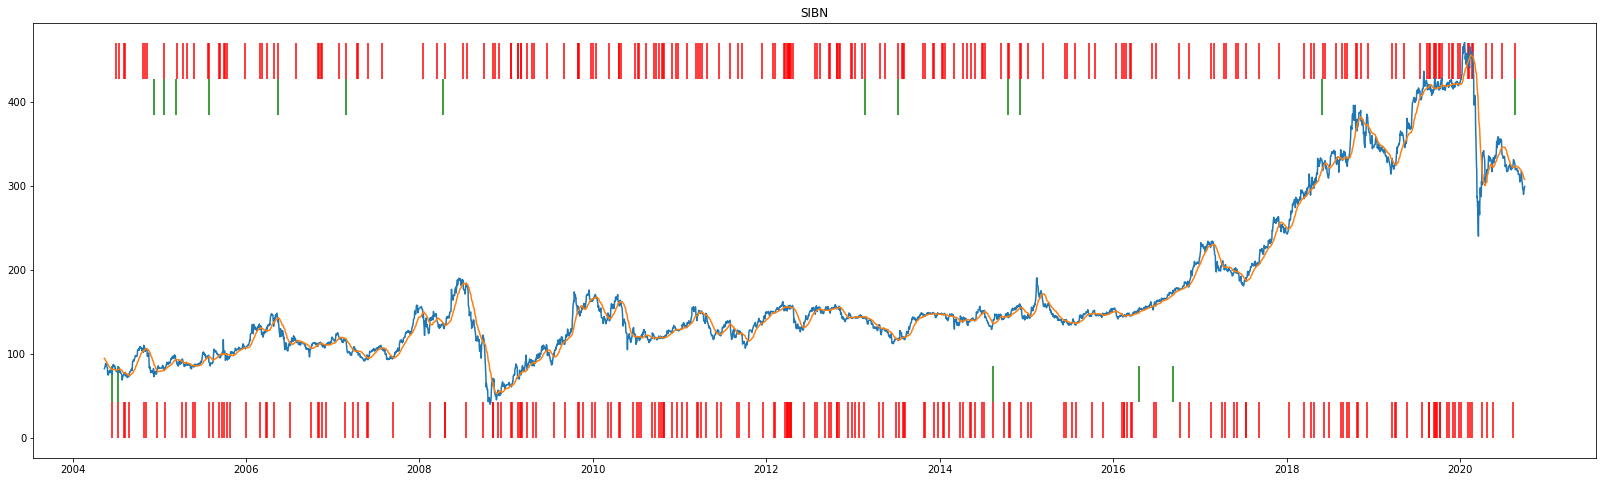

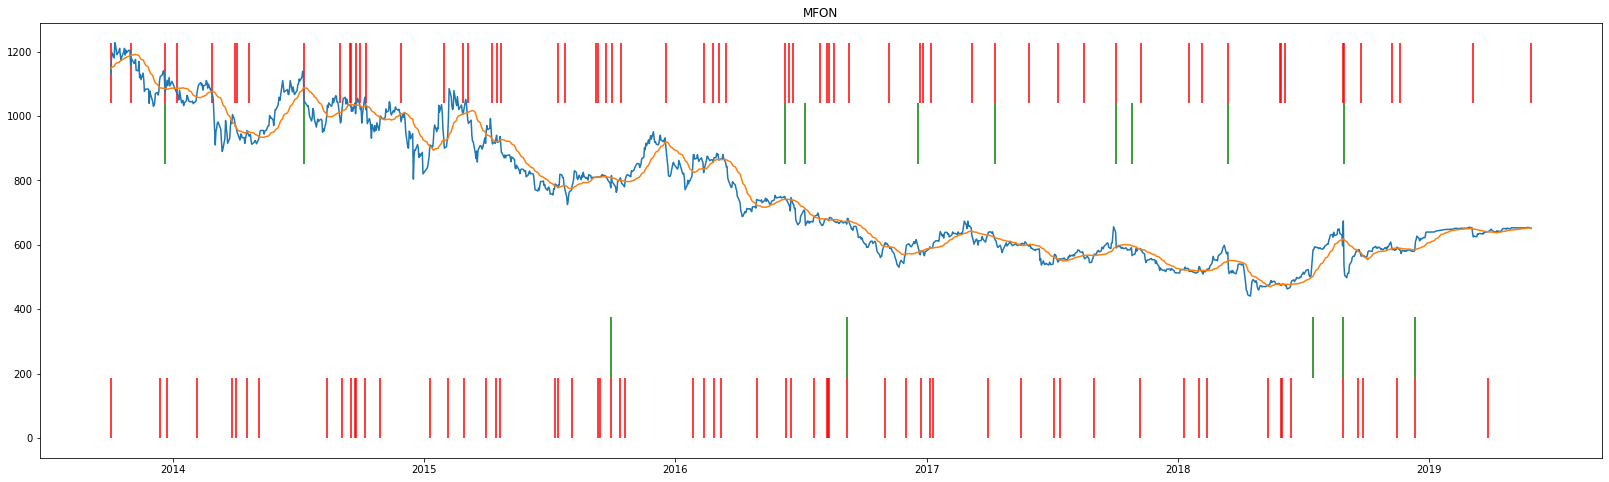

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'RASP'

'accuracy_label1 : 0.85'

'accuracy_label2 : 0.82'

'SNGS'

'accuracy_label1 : 0.86'

'accuracy_label2 : 0.87'

'SNGSP'

'accuracy_label1 : 0.84'

'accuracy_label2 : 0.88'

'BANE'

'accuracy_label1 : 0.87'

'accuracy_label2 : 0.82'

'SIBN'

'accuracy_label1 : 0.85'

'accuracy_label2 : 0.88'

'MFON'

'accuracy_label1 : 0.74'

'accuracy_label2 : 0.89'

Wall time: 7.15 s


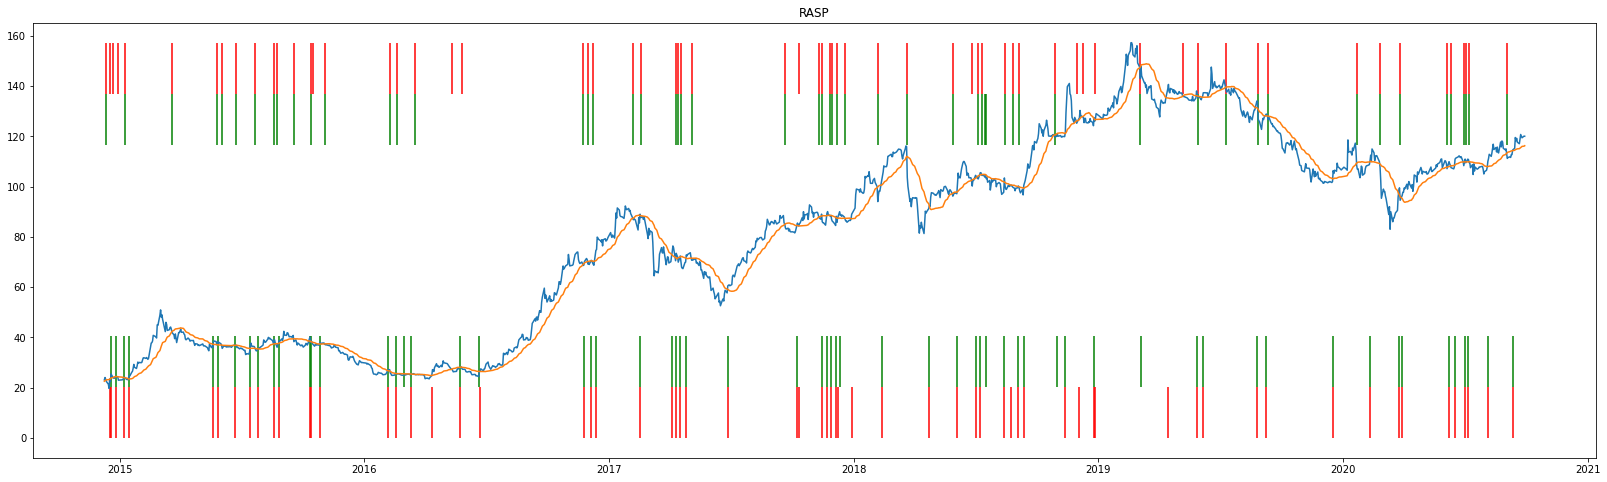

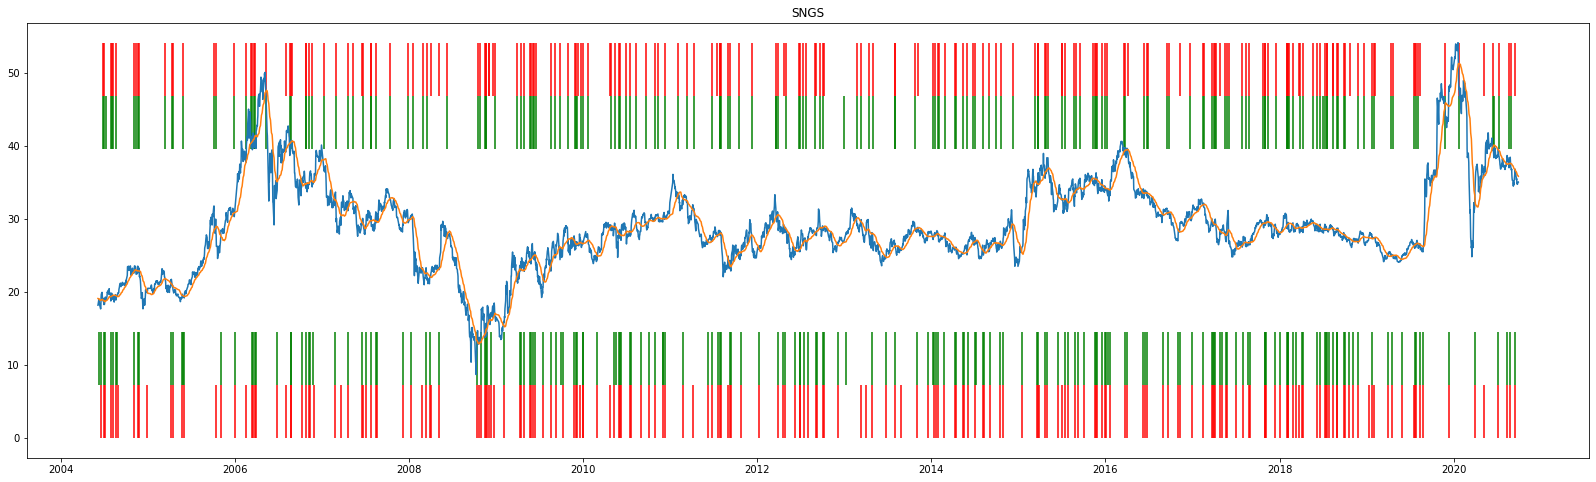

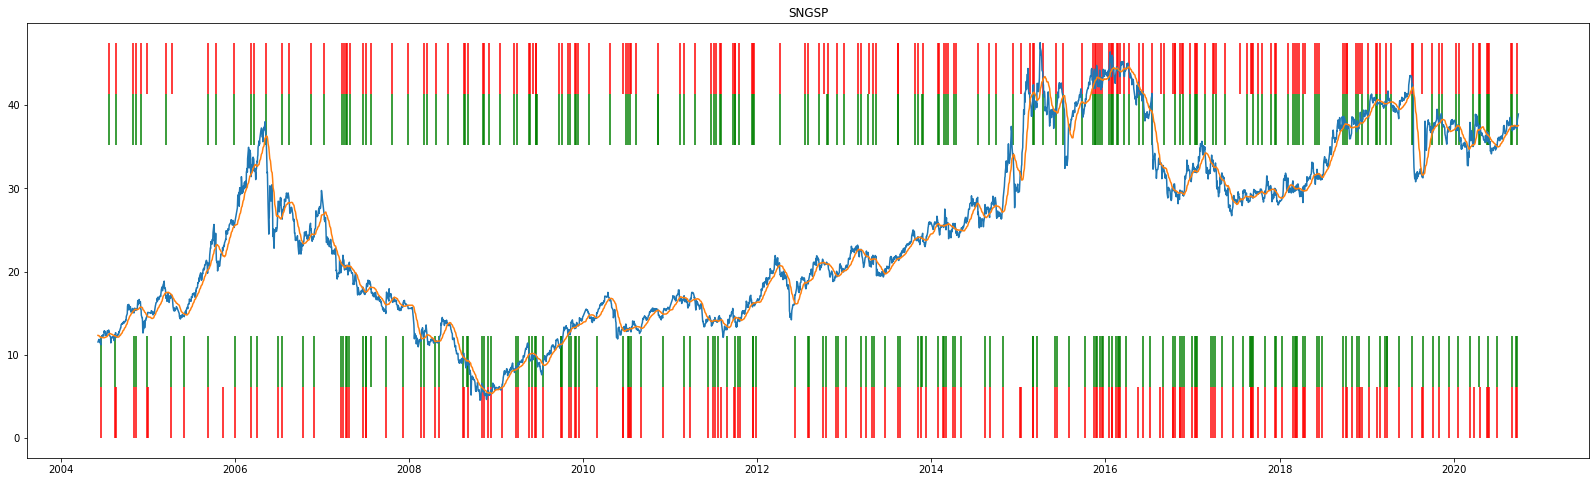

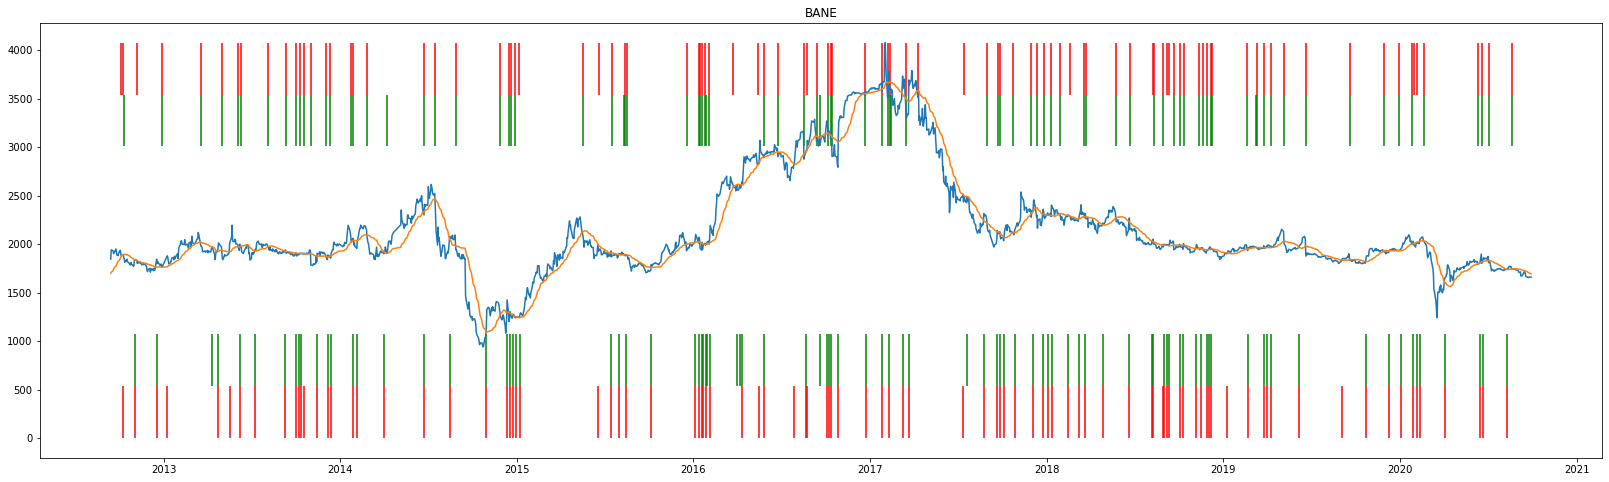

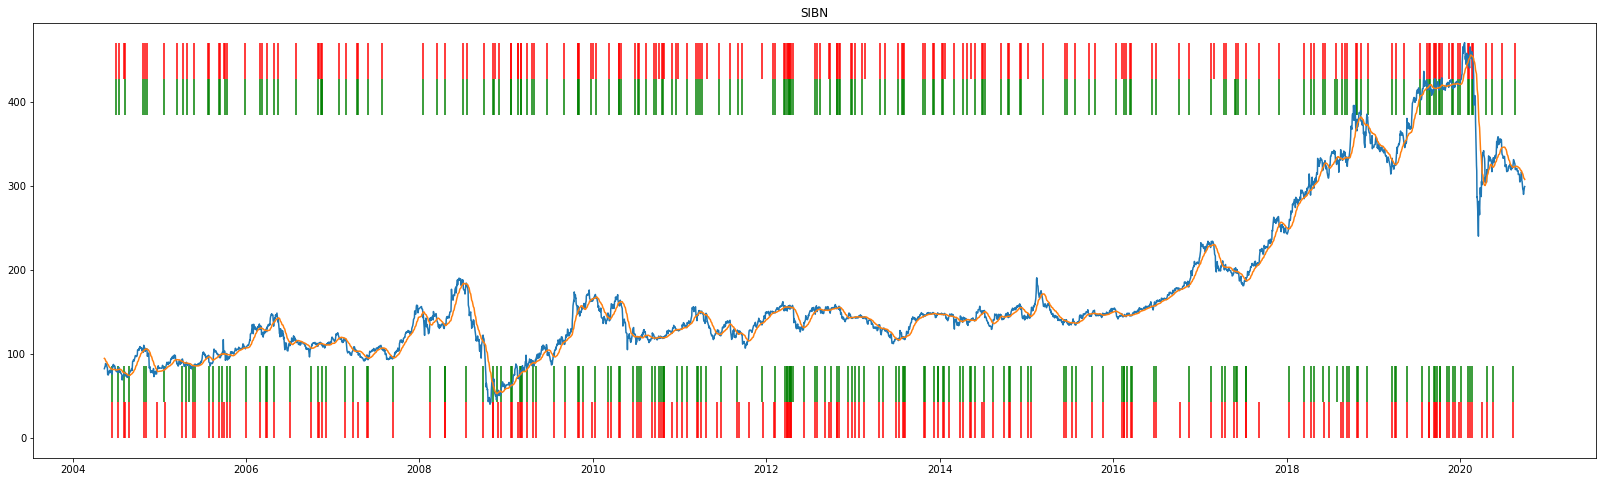

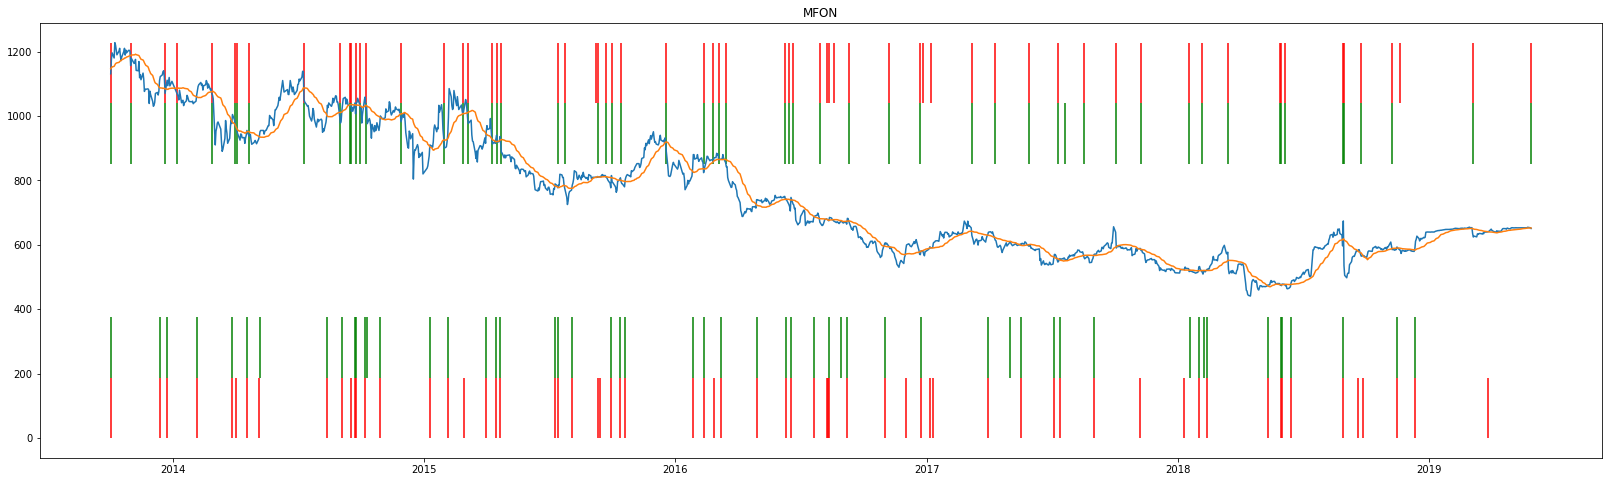

In [10]:
%%time

#paint calculate, 

df_merg_test = df_merg.iloc[te_n:]
df_merg_test['fact']  =  np.argmax(y_test, axis=1)
df_merg_test['forec'] =  np.argmax(model.predict(x_test_i), axis=1)

#метки для графиков 

leble = df_merg_test[df_merg_test['fact']  == 2][['Date', 'Close', 'Symbol', 'fact', 'forec']]
forec = df_merg_test[df_merg_test['forec'] == 2][['Date', 'Close', 'Symbol']]

leble1 = df_merg_test[df_merg_test['fact']  == 1][['Date', 'Close', 'Symbol', 'fact', 'forec']]
forec1 = df_merg_test[df_merg_test['forec'] == 1][['Date', 'Close', 'Symbol']]

leble2 = df_merg_test[df_merg_test['fact']  == 0][['Date', 'Close', 'Symbol', 'fact', 'forec']]
forec2 = df_merg_test[df_merg_test['forec'] == 0][['Date', 'Close', 'Symbol']]

# Point

for ii in df_merg['Symbol'].iloc[te_n:].unique():
#    display(ii)
    df_me = df_merg_test[df_merg_test['Symbol'] == ii]
    display(ii)
    for gg in [1,2,0]:
        
        k = accuracy_score(df_me[df_me['fact'] == gg]['fact'], df_me[df_me['fact'] == gg]['forec']).round(2)
        n = df_me[df_me['fact'] == gg]['fact'].count()
        display('accuracy_label{} : {}, count {}'.format(gg, k, n))
        

C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'RASP'

'accuracy_label1 : 0.94, count 135'

'accuracy_label2 : 0.93, count 134'

'accuracy_label0 : 0.97, count 1192'

'SNGS'

'accuracy_label1 : 0.95, count 373'

'accuracy_label2 : 0.95, count 382'

'accuracy_label0 : 0.97, count 3328'

'SNGSP'

'accuracy_label1 : 0.97, count 405'

'accuracy_label2 : 0.94, count 338'

'accuracy_label0 : 0.97, count 3340'

'BANE'

'accuracy_label1 : 0.92, count 192'

'accuracy_label2 : 0.96, count 174'

'accuracy_label0 : 0.97, count 1646'

'SIBN'

'accuracy_label1 : 0.97, count 420'

'accuracy_label2 : 0.92, count 356'

'accuracy_label0 : 0.98, count 3322'

'MFON'

'accuracy_label1 : 0.92, count 140'

'accuracy_label2 : 0.93, count 125'

'accuracy_label0 : 0.98, count 1157'

Wall time: 2min 53s


'RASP'

'accuracy_label1 : 0.91'

'accuracy_label2 : 0.86'

'SNGS'

'accuracy_label1 : 0.88'

'accuracy_label2 : 0.93'

'SNGSP'

'accuracy_label1 : 0.87'

'accuracy_label2 : 0.87'

'BANE'

'accuracy_label1 : 0.9'

'accuracy_label2 : 0.9'

'SIBN'

'accuracy_label1 : 0.87'

'accuracy_label2 : 0.91'

'MFON'

'accuracy_label1 : 0.77'

'accuracy_label2 : 0.95'

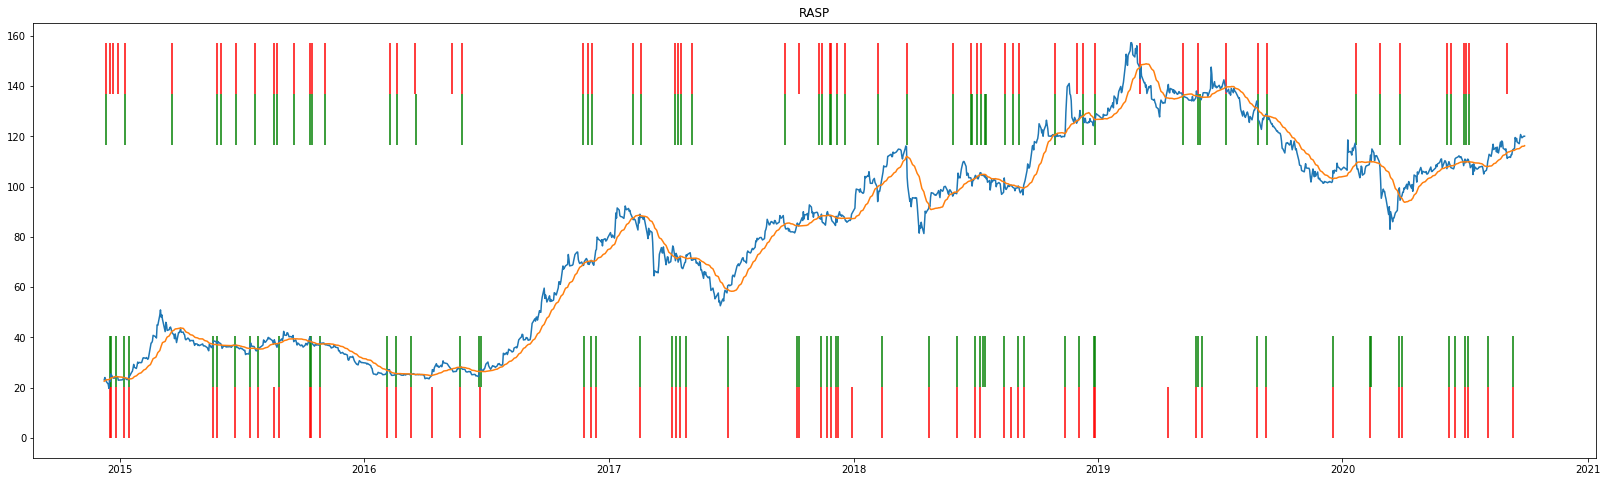

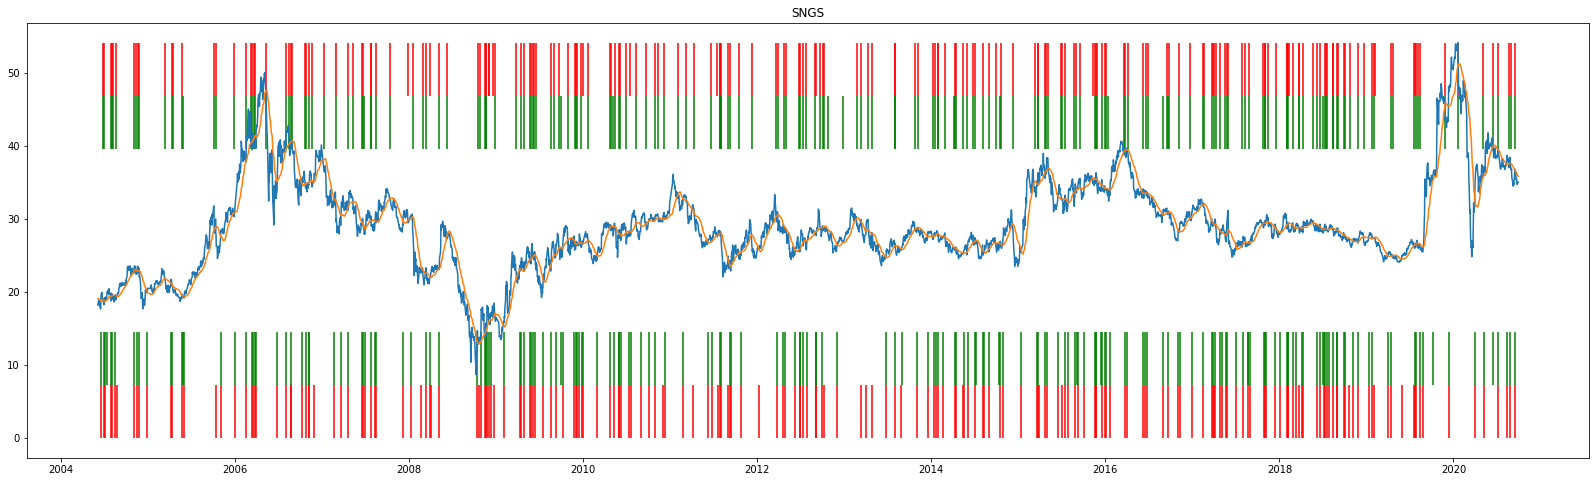

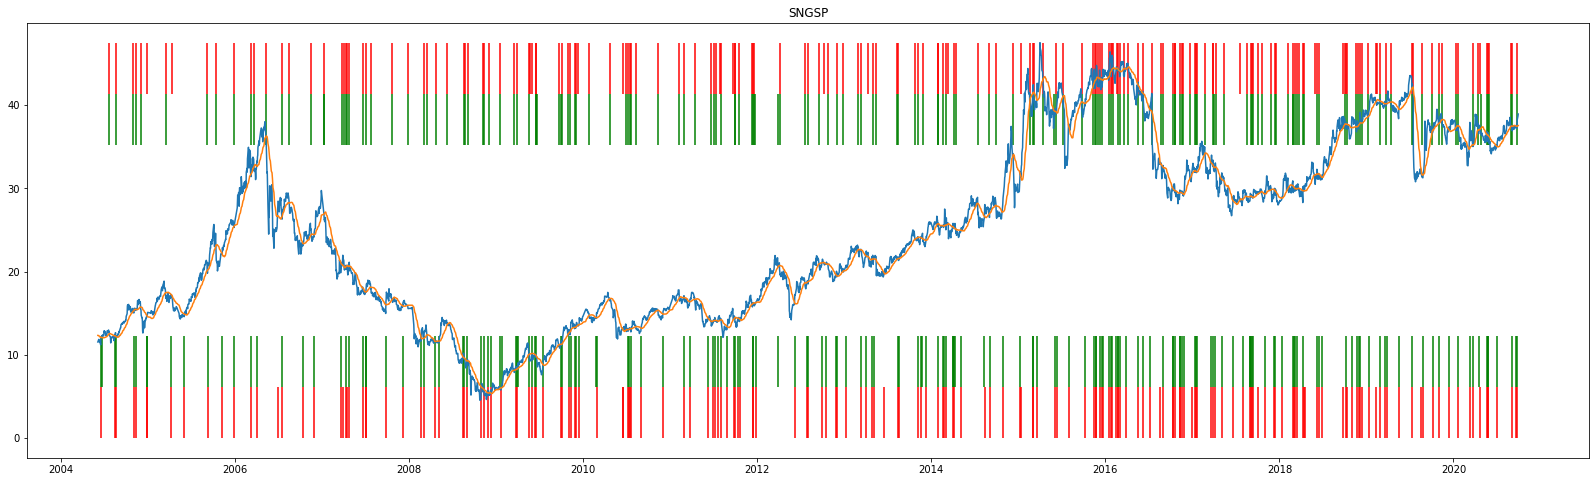

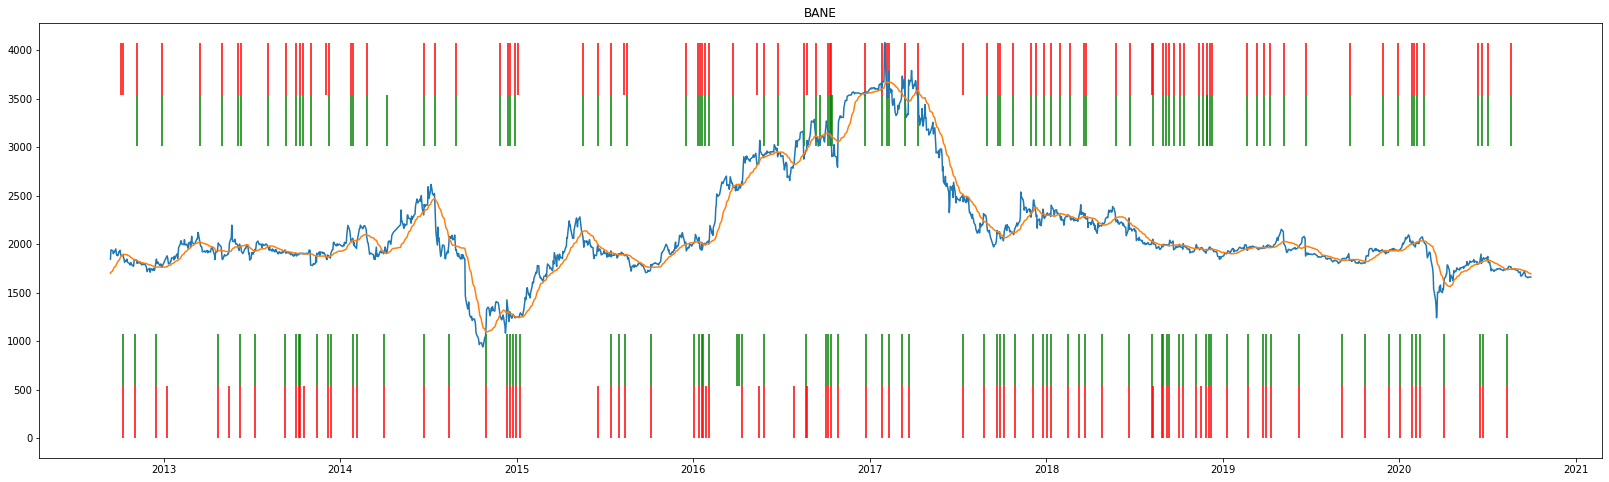

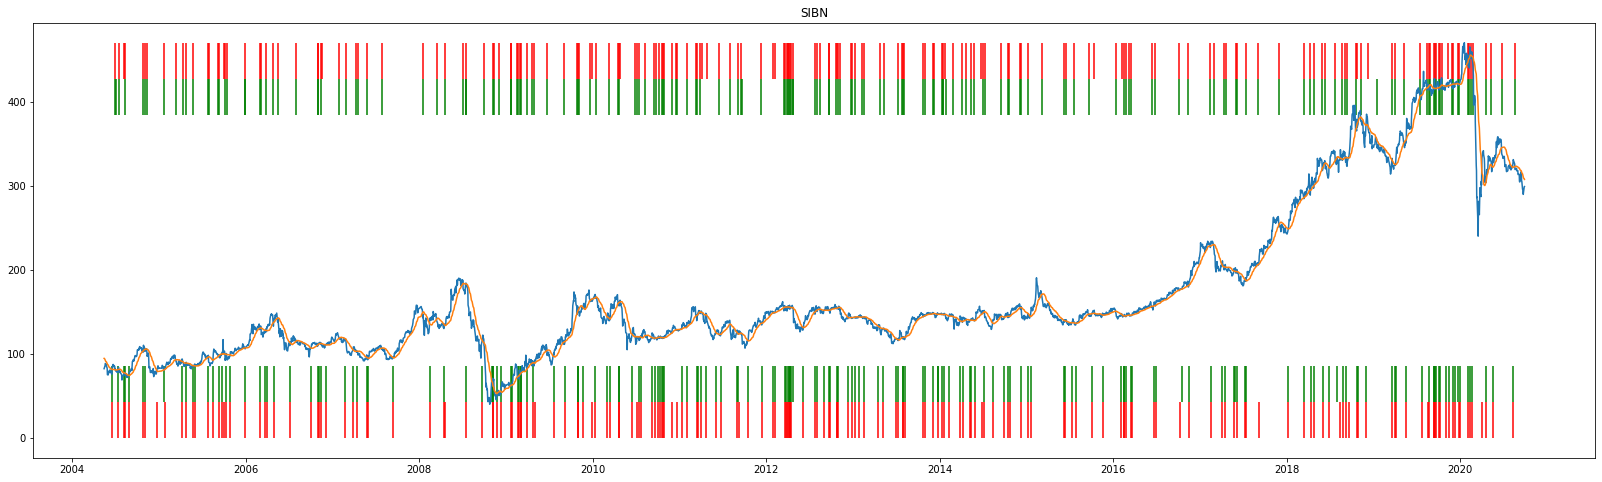

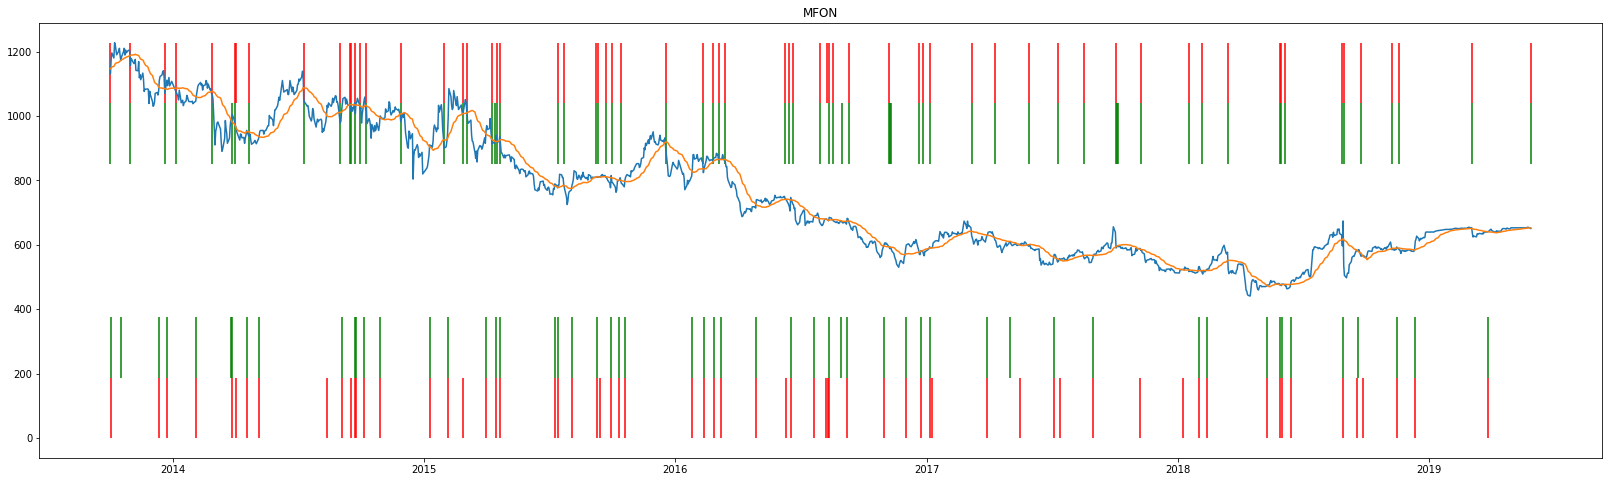

In [89]:

#train on 25 exsamples, 500 epoches, sma25

In [35]:
for pp in range(iter):
  #  for aa in ['adam', 'sgd', 'rmsprop']:
    for aa in ['adam']:
        print(aa)
        print(pp)
        metrics(str(aaa)  + str(pp) + str(aa) +'_best_model_keras',x_test_i,x_train_i,x_cv_i, 0.55,10, 0)

adam
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
keras evaluate test= [0.04321664049479347, 0.98199195, 0.9820652]
keras evaluate train= [0.024068512908009425, 0.9937525, 0.9937749]
test
[[15324    68    46]
 [  103   757     0]
 [   92     0   769]]
train
[[76939   125    89]
 [  136  4191     0]
 [  186     0  4128]]
cv
[[10216    48    41]
 [   49   518     0]
 [   56     0   512]]
F1 score (weighted) 0.9818016489974422
F1 score (macro) 0.9353986103212298
F1 score (micro) 0.9819919575732852
cohen's Kappa 0.900779288137613
Recall of class 0 = 0.99
Recall of class 1 = 0.88
Recall of class 2 = 0.89
Recall avg 0.92
end
